## Q1: What is the distribution of images across shark species in the dataset?


In [ ]:
species_name_mapping = {
    'Great-White Shark': 'Carcharodon carcharias',
    'Hammerhead Shark': 'Sphyrna mokarran', # Assuming Great Hammerhead for now
    'Lemon Shark': 'Negaprion brevirostris',
    'Mako Shark': 'Isurus oxyrinchus', # Assuming Shortfin Mako
    'Nurse Shark': 'Nebrius ferrugineus',
    'Sand Tiger Shark': 'Carcharias taurus',
    'Thresher Shark': 'Alopias vulpinus', # Assuming Common Thresher
    'Tiger Shark': 'Galeocerdo cuvier',
    'Whale Shark': 'Rhincodon typus',
    'Whitetip Shark': 'Carcharhinus longimanus' # Assuming Oceanic Whitetip
}

print("Species name mapping created:")
for common, scientific in species_name_mapping.items():
    print(f"  {common}: {scientific}")

Species name mapping created:
  Great-White Shark: Carcharodon carcharias
  Hammerhead Shark: Sphyrna mokarran
  Lemon Shark: Negaprion brevirostris
  Mako Shark: Isurus oxyrinchus
  Nurse Shark: Nebrius ferrugineus
  Sand Tiger Shark: Carcharias taurus
  Thresher Shark: Alopias vulpinus
  Tiger Shark: Galeocerdo cuvier
  Whale Shark: Rhincodon typus
  Whitetip Shark: Carcharhinus longimanus




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



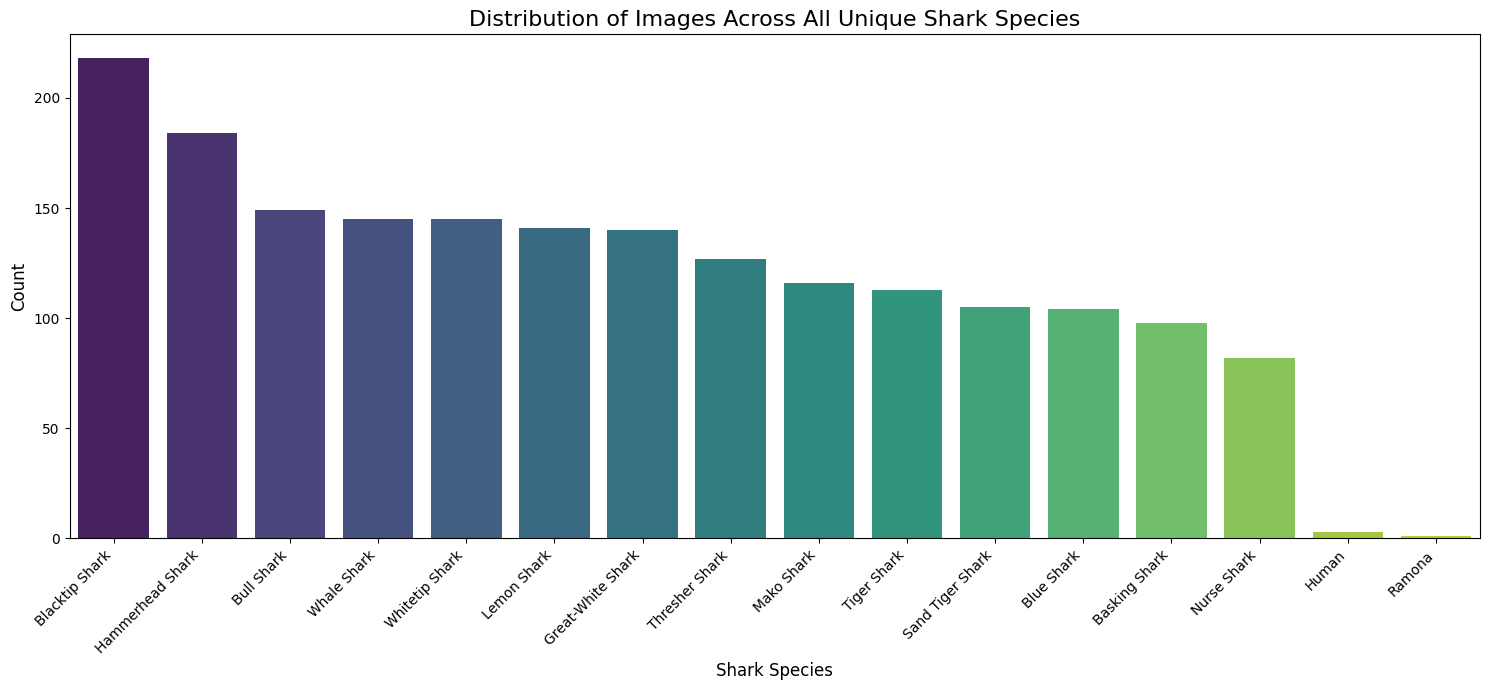

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Concatenate the 'class' columns from the train_df, valid_df, and test_df DataFrames
all_species_classes = pd.concat([train_df['class'], valid_df['class'], test_df['class']])

# 2. Count the occurrences of each unique species
species_distribution = all_species_classes.value_counts()

# 3. Create a bar plot to visualize the distribution of images per species
plt.figure(figsize=(15, 7))
sns.barplot(x=species_distribution.index, y=species_distribution.values, palette='viridis')

# 4. Set the title of the plot
plt.title('Distribution of Images Across All Unique Shark Species', fontsize=16)

# 5. Label the x-axis and y-axis
plt.xlabel('Shark Species', fontsize=12)
plt.ylabel('Count', fontsize=12)

# 6. Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

# 7. Display the plot
plt.show()

## Q2: How do image brightness and contrast vary across species?

In [ ]:
import cv2
import numpy as np
import os

def calculate_brightness(image_path):
    """Calculates the average pixel intensity (brightness) of an image."""
    img = cv2.imread(image_path)
    if img is None:
        return None
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return np.mean(gray)

def calculate_contrast(image_path):
    """Calculates the standard deviation of pixel intensities (contrast) of an image."""
    img = cv2.imread(image_path)
    if img is None:
        return None
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return np.std(gray)

print("Brightness and contrast calculation functions defined.")

Brightness and contrast calculation functions defined.


In [ ]:
image_metrics = {}

# Ensure common_classes is available (from previous steps, it should be derived from train_generator_filtered)
# common_classes = list(train_generator_filtered.class_indices.keys())
# Re-initialize `common_classes` using the `species_name_mapping` keys, as it contains the common names
common_classes = list(species_name_mapping.keys())


for species in common_classes:
    # Filter the training DataFrame for the current species
    species_df = train_df_filtered[train_df_filtered['class'] == species]

    # Select a representative sample of image paths (e.g., the first 10 images)
    # Ensure there are enough images for the sample
    sample_size = min(10, len(species_df))
    if sample_size == 0:
        print(f"No images found for species: {species}. Skipping.")
        continue

    sampled_filenames = species_df['filename'].sample(sample_size).tolist()

    image_metrics[species] = []

    for filename in sampled_filenames:
        full_image_path = os.path.join(train_dir, filename)
        brightness = calculate_brightness(full_image_path)
        contrast = calculate_contrast(full_image_path)

        if brightness is not None and contrast is not None:
            image_metrics[species].append({'brightness': brightness, 'contrast': contrast})
        else:
            print(f"Warning: Could not process image {full_image_path}")

print("Calculated Image Metrics (Brightness and Contrast) per Species:")
for species, metrics_list in image_metrics.items():
    print(f"Species: {species}")
    for metric in metrics_list:
        print(f"  Brightness: {metric['brightness']:.2f}, Contrast: {metric['contrast']:.2f}")
    print("-" * 30)

Calculated Image Metrics (Brightness and Contrast) per Species:
Species: Great-White Shark
  Brightness: 94.30, Contrast: 29.26
  Brightness: 118.05, Contrast: 70.66
  Brightness: 70.66, Contrast: 38.76
  Brightness: 137.65, Contrast: 35.54
  Brightness: 134.02, Contrast: 62.15
  Brightness: 98.03, Contrast: 46.24
  Brightness: 72.08, Contrast: 59.85
  Brightness: 86.39, Contrast: 46.45
  Brightness: 55.15, Contrast: 37.98
  Brightness: 110.71, Contrast: 33.43
------------------------------
Species: Hammerhead Shark
  Brightness: 97.52, Contrast: 53.21
  Brightness: 126.85, Contrast: 49.91
  Brightness: 92.50, Contrast: 22.56
  Brightness: 85.64, Contrast: 28.77
  Brightness: 115.00, Contrast: 54.47
  Brightness: 114.12, Contrast: 51.44
  Brightness: 135.20, Contrast: 59.52
  Brightness: 80.52, Contrast: 49.23
  Brightness: 80.52, Contrast: 49.23
  Brightness: 94.22, Contrast: 45.46
------------------------------
Species: Lemon Shark
  Brightness: 94.02, Contrast: 44.10
  Brightness: 9

In [ ]:
image_metrics = {}

# Re-initialize `common_classes` using the `species_name_mapping` keys, as it contains the common names
common_classes = list(species_name_mapping.keys())

# Re-create train_df_filtered (as it was lost from the kernel state)
train_df_filtered = train_df[train_df['class'].isin(common_classes)].copy()

for species in common_classes:
    # Filter the training DataFrame for the current species
    species_df = train_df_filtered[train_df_filtered['class'] == species]

    # Select a representative sample of image paths (e.g., the first 10 images)
    # Ensure there are enough images for the sample
    sample_size = min(10, len(species_df))
    if sample_size == 0:
        print(f"No images found for species: {species}. Skipping.")
        continue

    sampled_filenames = species_df['filename'].sample(sample_size).tolist()

    image_metrics[species] = []

    for filename in sampled_filenames:
        full_image_path = os.path.join(train_dir, filename)
        brightness = calculate_brightness(full_image_path)
        contrast = calculate_contrast(full_image_path)

        if brightness is not None and contrast is not None:
            image_metrics[species].append({'brightness': brightness, 'contrast': contrast})
        else:
            print(f"Warning: Could not process image {full_image_path}")

print("Calculated Image Metrics (Brightness and Contrast) per Species:")
for species, metrics_list in image_metrics.items():
    print(f"Species: {species}")
    for metric in metrics_list:
        print(f"  Brightness: {metric['brightness']:.2f}, Contrast: {metric['contrast']:.2f}")
    print("-" * 30)

Calculated Image Metrics (Brightness and Contrast) per Species:
Species: Great-White Shark
  Brightness: 92.43, Contrast: 41.87
  Brightness: 89.88, Contrast: 39.38
  Brightness: 107.33, Contrast: 60.88
  Brightness: 81.71, Contrast: 54.64
  Brightness: 67.38, Contrast: 37.99
  Brightness: 143.41, Contrast: 53.52
  Brightness: 81.37, Contrast: 33.18
  Brightness: 103.82, Contrast: 35.15
  Brightness: 72.14, Contrast: 23.52
  Brightness: 96.09, Contrast: 57.26
------------------------------
Species: Hammerhead Shark
  Brightness: 80.52, Contrast: 49.23
  Brightness: 91.87, Contrast: 36.95
  Brightness: 80.52, Contrast: 49.23
  Brightness: 114.00, Contrast: 43.90
  Brightness: 60.90, Contrast: 39.72
  Brightness: 110.21, Contrast: 35.62
  Brightness: 90.35, Contrast: 46.25
  Brightness: 121.34, Contrast: 47.71
  Brightness: 135.20, Contrast: 59.52
  Brightness: 101.73, Contrast: 22.52
------------------------------
Species: Lemon Shark
  Brightness: 103.14, Contrast: 75.03
  Brightness: 



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



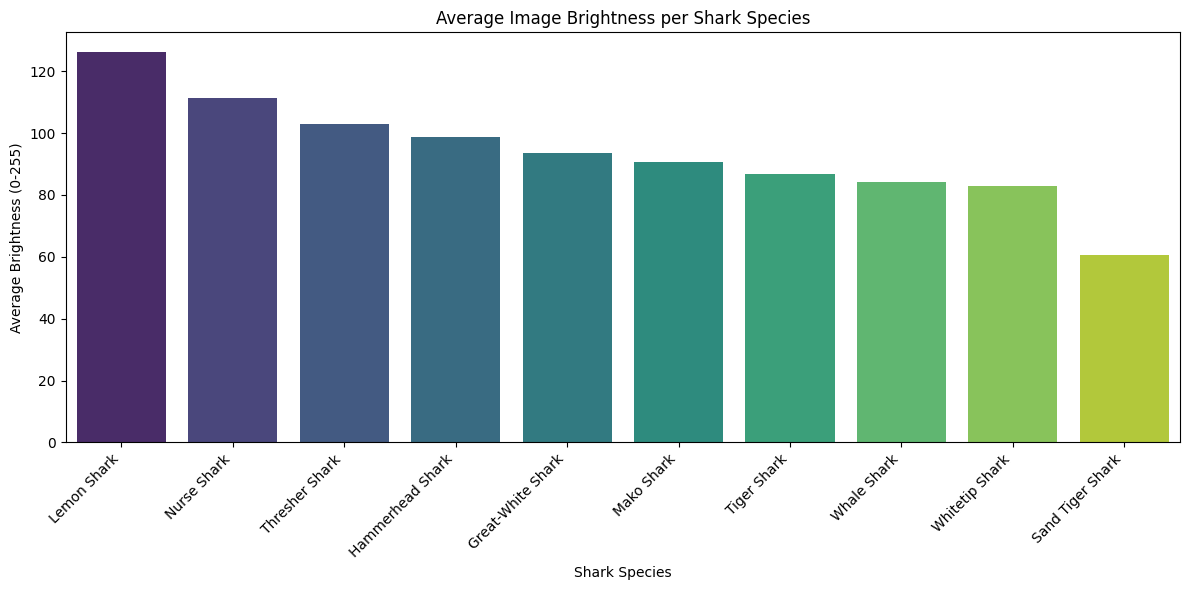



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



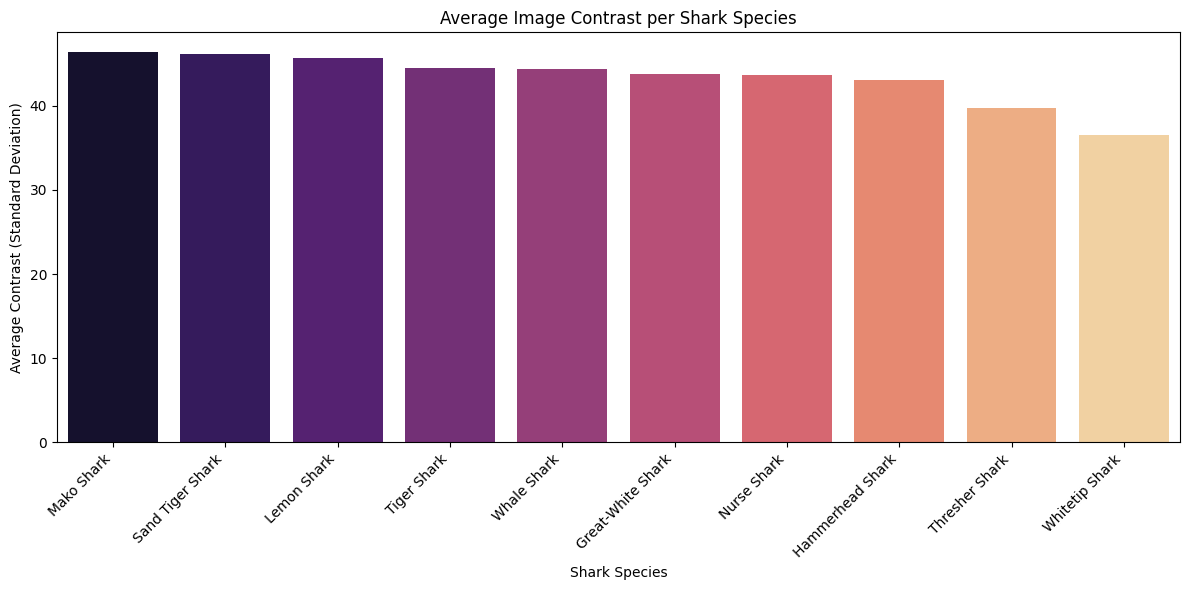

Average brightness and contrast per species plotted.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for plotting
brightness_data = []
contrast_data = []

for species, metrics_list in image_metrics.items():
    if metrics_list:
        avg_brightness = np.mean([m['brightness'] for m in metrics_list])
        avg_contrast = np.mean([m['contrast'] for m in metrics_list])
        brightness_data.append({'Species': species, 'Average Brightness': avg_brightness})
        contrast_data.append({'Species': species, 'Average Contrast': avg_contrast})

brightness_df = pd.DataFrame(brightness_data)
contrast_df = pd.DataFrame(contrast_data)

# Sort for better visualization
brightness_df = brightness_df.sort_values(by='Average Brightness', ascending=False)
contrast_df = contrast_df.sort_values(by='Average Contrast', ascending=False)

# Plotting Average Brightness
plt.figure(figsize=(12, 6))
sns.barplot(x='Species', y='Average Brightness', data=brightness_df, palette='viridis')
plt.title('Average Image Brightness per Shark Species')
plt.xlabel('Shark Species')
plt.ylabel('Average Brightness (0-255)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting Average Contrast
plt.figure(figsize=(12, 6))
sns.barplot(x='Species', y='Average Contrast', data=contrast_df, palette='magma')
plt.title('Average Image Contrast per Shark Species')
plt.xlabel('Shark Species')
plt.ylabel('Average Contrast (Standard Deviation)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Average brightness and contrast per species plotted.")

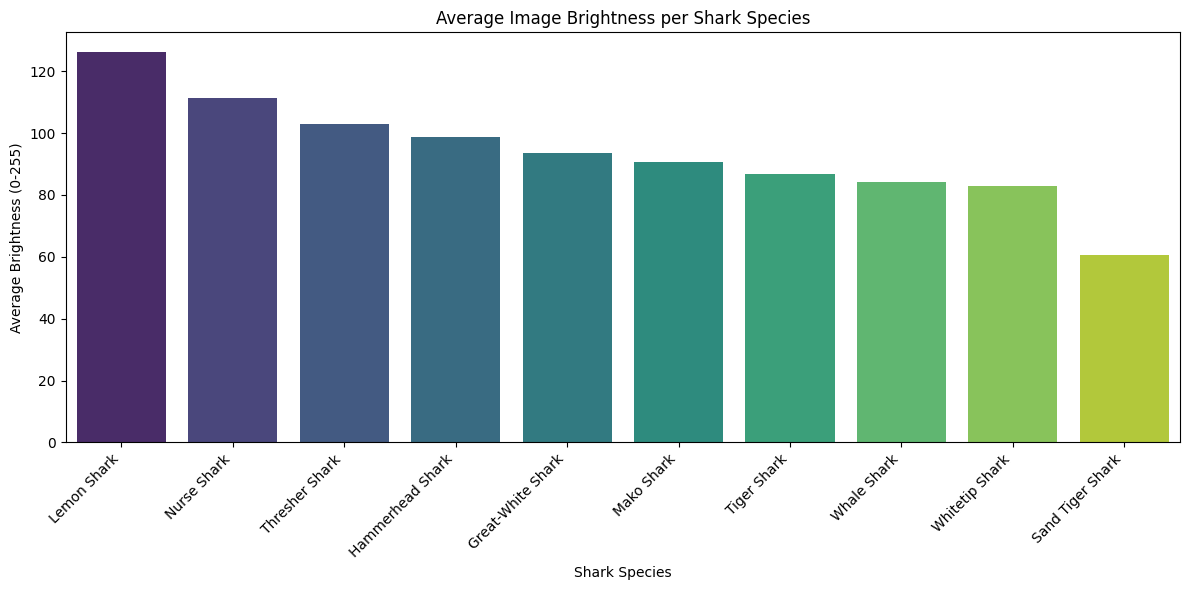

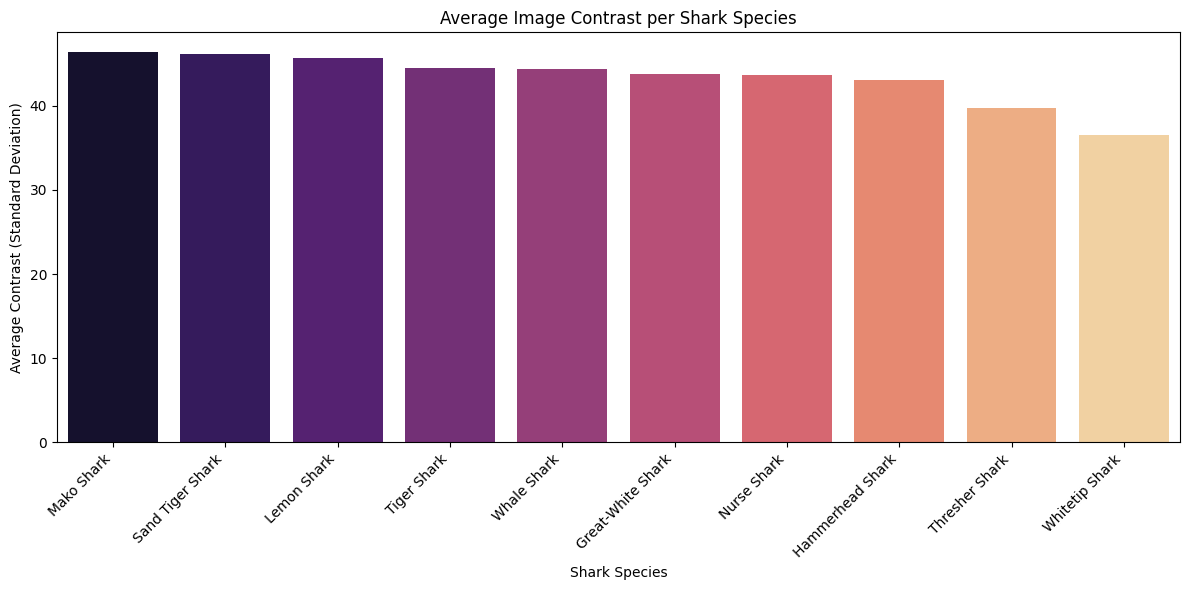

Average brightness and contrast per species plotted.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for plotting
brightness_data = []
contrast_data = []

for species, metrics_list in image_metrics.items():
    if metrics_list:
        avg_brightness = np.mean([m['brightness'] for m in metrics_list])
        avg_contrast = np.mean([m['contrast'] for m in metrics_list])
        brightness_data.append({'Species': species, 'Average Brightness': avg_brightness})
        contrast_data.append({'Species': species, 'Average Contrast': avg_contrast})

brightness_df = pd.DataFrame(brightness_data)
contrast_df = pd.DataFrame(contrast_data)

# Sort for better visualization
brightness_df = brightness_df.sort_values(by='Average Brightness', ascending=False)
contrast_df = contrast_df.sort_values(by='Average Contrast', ascending=False)

# Plotting Average Brightness
plt.figure(figsize=(12, 6))
sns.barplot(x='Species', y='Average Brightness', data=brightness_df, palette='viridis', hue='Species', legend=False)
plt.title('Average Image Brightness per Shark Species')
plt.xlabel('Shark Species')
plt.ylabel('Average Brightness (0-255)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting Average Contrast
plt.figure(figsize=(12, 6))
sns.barplot(x='Species', y='Average Contrast', data=contrast_df, palette='magma', hue='Species', legend=False)
plt.title('Average Image Contrast per Shark Species')
plt.xlabel('Shark Species')
plt.ylabel('Average Contrast (Standard Deviation)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Average brightness and contrast per species plotted.")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten the image_metrics dictionary into a list of dictionaries for DataFrame creation
flattened_metrics = []
for species, metrics_list in image_metrics.items():
    for metric in metrics_list:
        flattened_metrics.append({'Species': species, 'Brightness': metric['brightness'], 'Contrast': metric['contrast']})

# Create a DataFrame from the flattened metrics
metrics_df = pd.DataFrame(flattened_metrics)

print("DataFrame created from image_metrics:")
print(metrics_df.head())

DataFrame created from image_metrics:
             Species  Brightness   Contrast
0  Great-White Shark   92.426247  41.865520
1  Great-White Shark   89.880775  39.379850
2  Great-White Shark  107.331910  60.877236
3  Great-White Shark   81.714700  54.635731
4  Great-White Shark   67.382768  37.992318




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



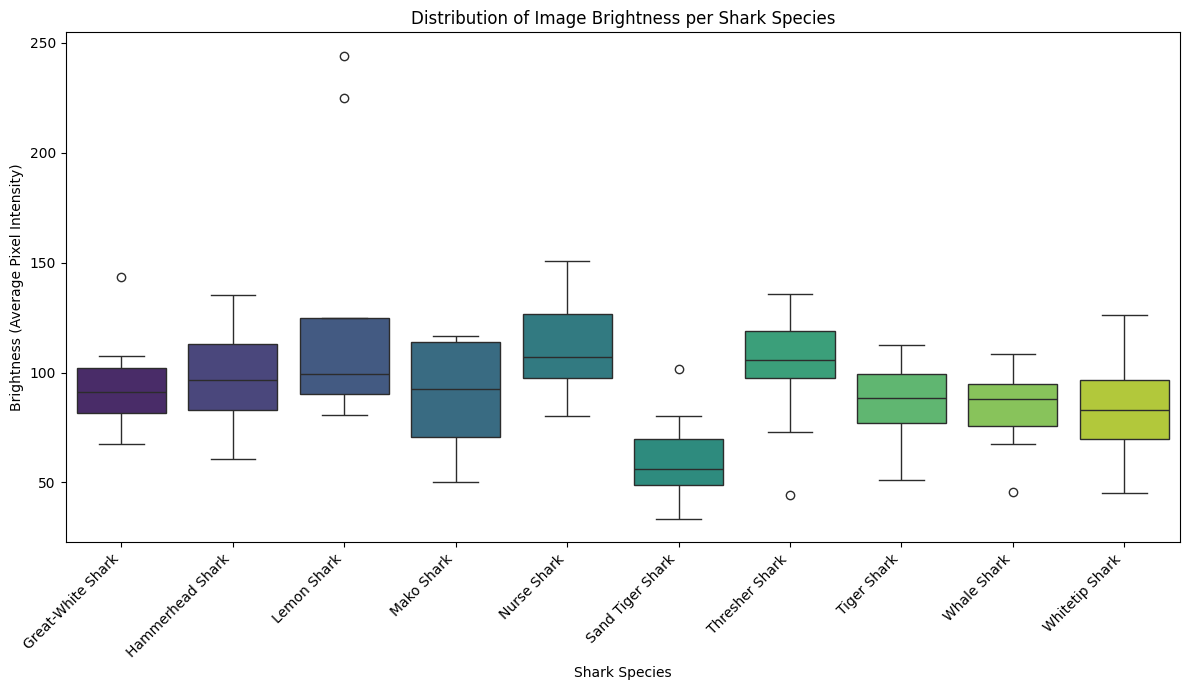



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



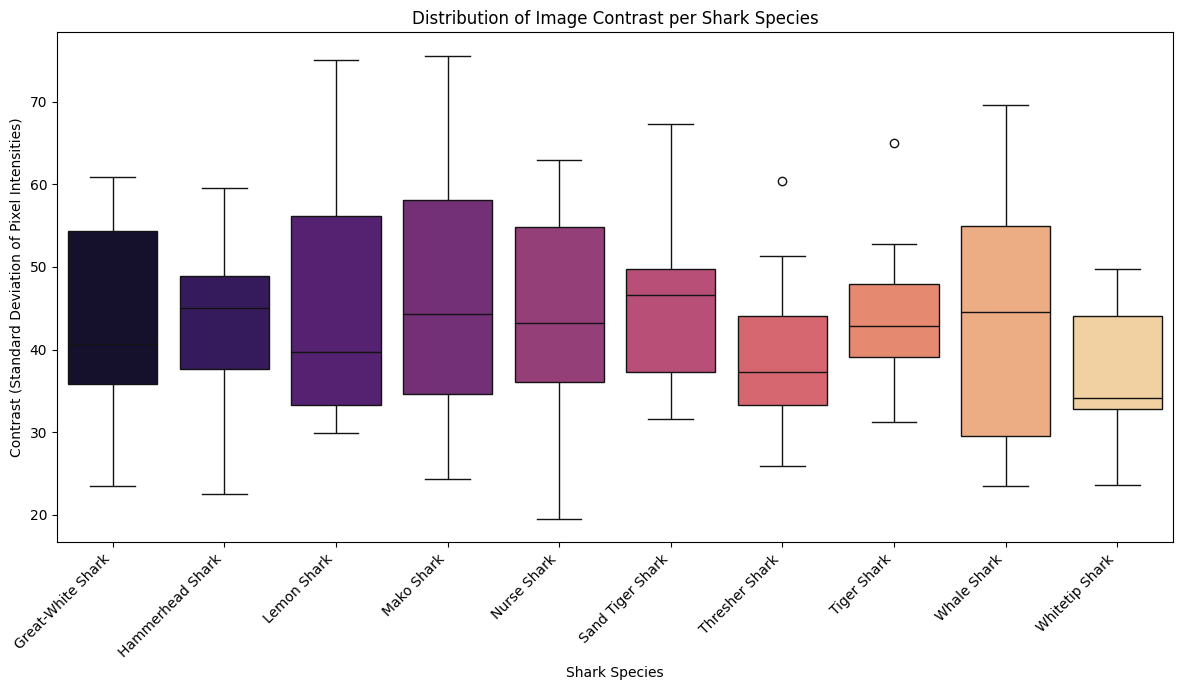

Box plots for Brightness and Contrast distributions per species generated.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a box plot for Brightness distribution
plt.figure(figsize=(12, 7))
sns.boxplot(x='Species', y='Brightness', data=metrics_df, palette='viridis')
plt.title('Distribution of Image Brightness per Shark Species')
plt.xlabel('Shark Species')
plt.ylabel('Brightness (Average Pixel Intensity)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Generate a box plot for Contrast distribution
plt.figure(figsize=(12, 7))
sns.boxplot(x='Species', y='Contrast', data=metrics_df, palette='magma')
plt.title('Distribution of Image Contrast per Shark Species')
plt.xlabel('Shark Species')
plt.ylabel('Contrast (Standard Deviation of Pixel Intensities)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Box plots for Brightness and Contrast distributions per species generated.")

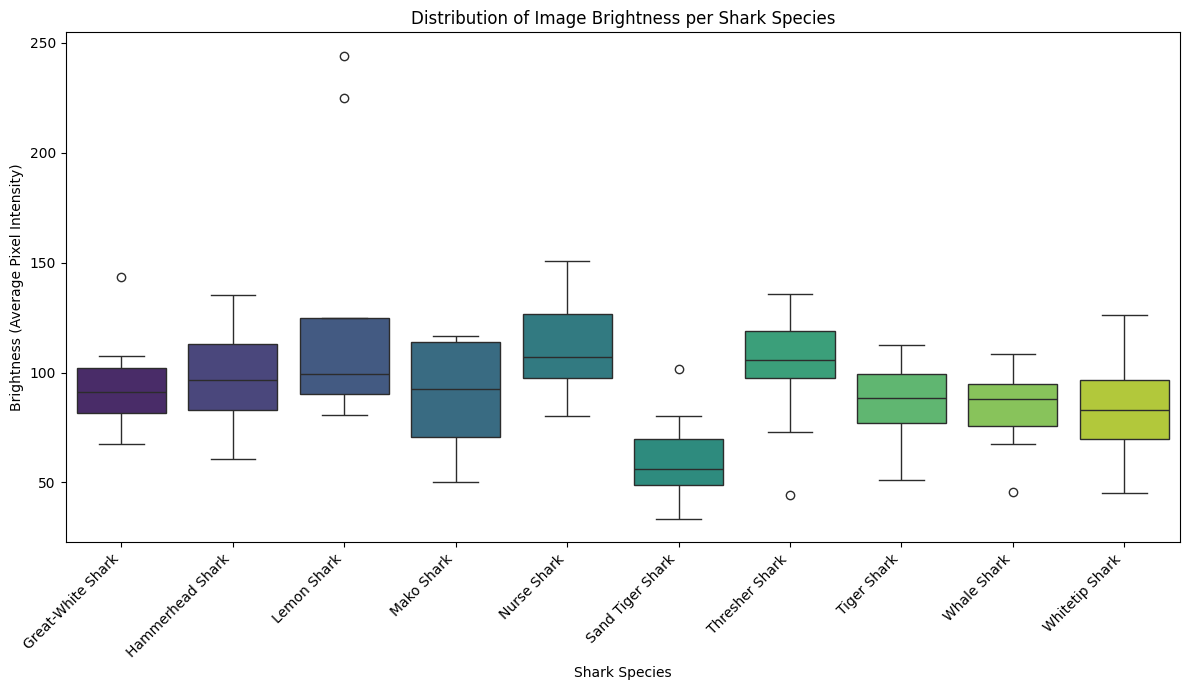

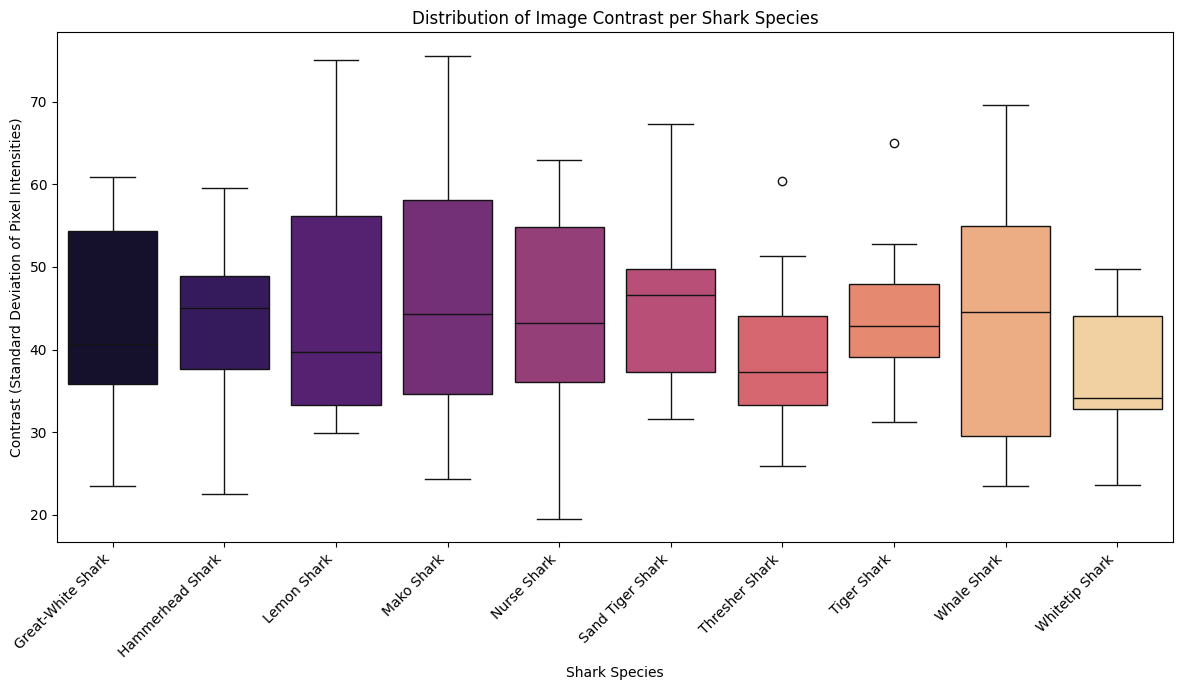

Box plots for Brightness and Contrast distributions per species generated.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a box plot for Brightness distribution
plt.figure(figsize=(12, 7))
sns.boxplot(x='Species', y='Brightness', data=metrics_df, palette='viridis', hue='Species', legend=False)
plt.title('Distribution of Image Brightness per Shark Species')
plt.xlabel('Shark Species')
plt.ylabel('Brightness (Average Pixel Intensity)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Generate a box plot for Contrast distribution
plt.figure(figsize=(12, 7))
sns.boxplot(x='Species', y='Contrast', data=metrics_df, palette='magma', hue='Species', legend=False)
plt.title('Distribution of Image Contrast per Shark Species')
plt.xlabel('Shark Species')
plt.ylabel('Contrast (Standard Deviation of Pixel Intensities)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Box plots for Brightness and Contrast distributions per species generated.")